In [182]:
import torch
from torch import Tensor
from torch.nn import Linear, MSELoss, functional as F
from torch.optim import SGD, Adam, RMSprop
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import sys

def data_generator(data_size, function):
    inputs = []
    labels = []
    
    # loop data_size times to generate the data
    for ix in range(data_size):
        
        # generate a random number between 0 and 1000
        x = np.around(np.random.randint(1000) / 1000 - .5, 2)
        
        # calculate the y value using the function 8x^2 + 4x - 3
        if function=='quadratic':
            y = np.around(10*x*x + (np.random.rand(1)-.5), 2)
        elif function=='cube':
            y = np.around(10*x*x*x + (np.random.rand(1)-.5), 2)
        else:
            sys.exit()
            
        # append the values to our input and labels lists
        inputs.append([x])
        labels.append(y)
        
    return inputs, labels

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = Linear(1, 20)
        self.fc2 = Linear(20, 10)
        self.fc3 = Linear(10, 1)
        
    def forward(self, x):
        x = F.dropout(F.relu(self.fc1(x)), p=0.5)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
def train(function, nb_epochs=5, data_size=10000):
    
    model = Net()
    # define the loss function
    critereon = MSELoss()
    # define the optimizer
    optimizer = SGD(model.parameters(), lr=0.01)

#     nb_epochs = 5
#     data_size = 10000

    # create our training loop
    for epoch in range(nb_epochs):
        
        X_train, y_train = data_generator(data_size, function)

        epoch_loss = 0;

        for ix in range(data_size):
            
            y_pred = model.forward(Variable(Tensor(X_train[ix])))

            loss = critereon(y_pred, Variable(Tensor(y_train[ix]), requires_grad=False))

            epoch_loss += loss.data.item()

            # ensure that we zero all the gradients in the model, otherwise we will just be adding onto them and end up with HUGE gradients
            optimizer.zero_grad()

            # compute the gradient of the loss with respect to the model parameters
            loss.backward()

            # make an update (step) on the parameters
            optimizer.step()

        print("Epoch: {} Loss: {}".format(epoch, epoch_loss/data_size))
        
    return model

In [178]:
def checkLayerPattern(model, x):

    w1 = model.fc1.weight.data.numpy()
    b1 = model.fc1.bias.data.numpy()
    w2 = model.fc2.weight.data.numpy()
    b2 = model.fc2.bias.data.numpy()
    w3 = model.fc3.weight.data.numpy()
    b3 = model.fc3.bias.data.numpy()

    # first hidden layer
    g1 = np.maximum(np.dot(x, w1.T)+b1, 0)

    for row_g1 in g1.T:
        plt.figure()
        plt.plot(t1, row_g1, 'yo')

    # second hidden layer
    g2 = np.maximum(np.dot(g1, w2.T)+b2, 0)
    for row_g2 in g2.T:
        plt.figure()
        plt.plot(t1, row_g2, 'bo')

    # output layer
    y = np.dot(g2, w3.T)+b3
    plt.figure()
    plt.plot(t1, y, 'ro')


Epoch: 0 Loss: 0.34932796627110474
Epoch: 1 Loss: 0.2141780960455204
Epoch: 2 Loss: 0.179054070543779
Epoch: 3 Loss: 0.16547318253688062
Epoch: 4 Loss: 0.15441701161974802


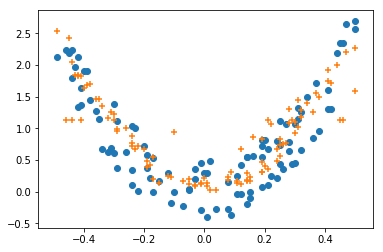

In [175]:
quadratic_model = train(function='quadratic')

X_test, y_test = data_generator(100, 'quadratic')
y_pred = quadratic_model(Variable(Tensor(X_test))).data.numpy()

plt.scatter(X_test, y_test, marker='o')
plt.scatter(X_test, y_pred, marker='+')
plt.show()

/Users/heyuhao/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


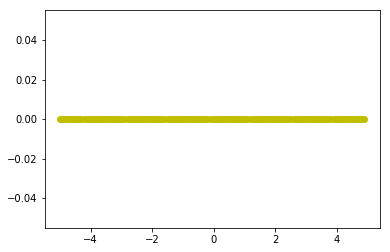

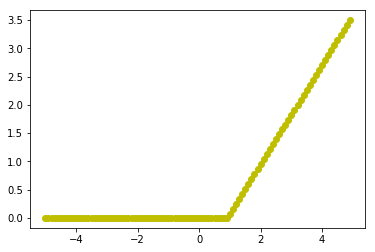

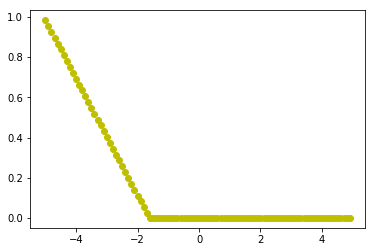

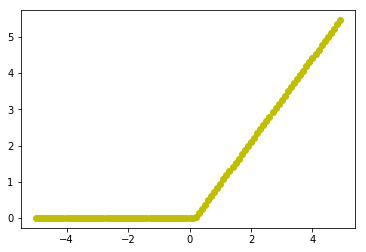

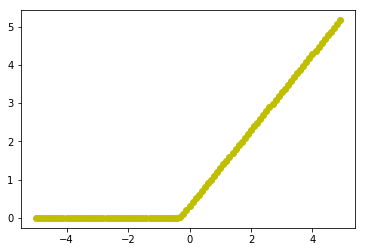

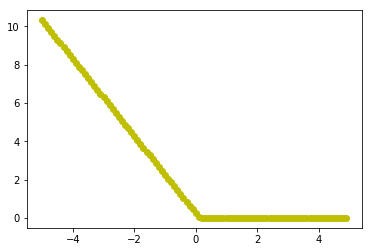

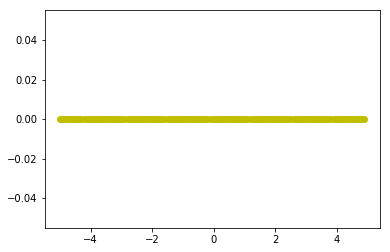

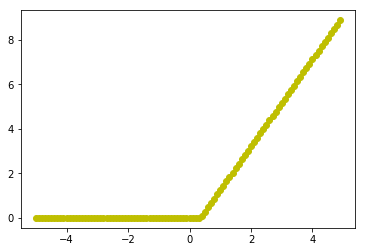

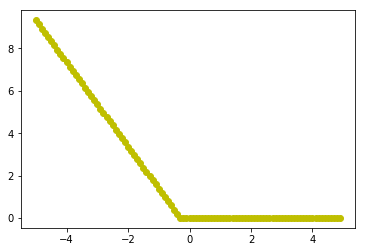

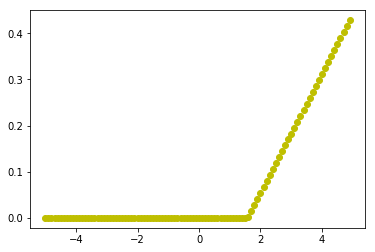

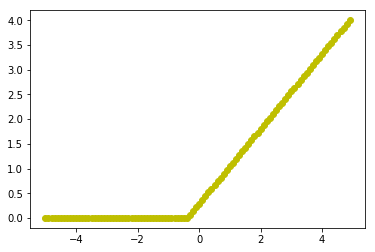

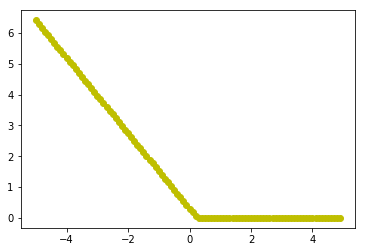

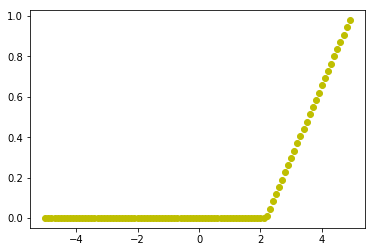

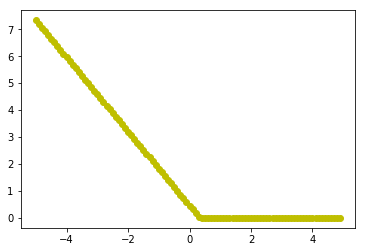

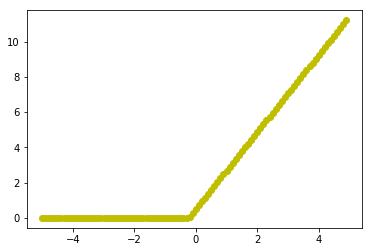

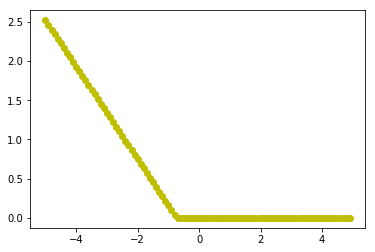

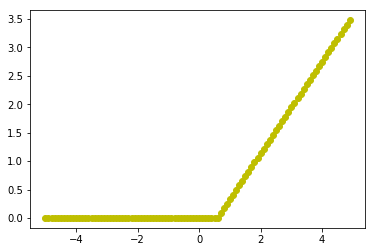

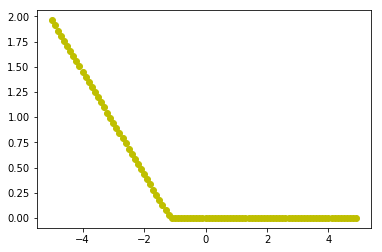

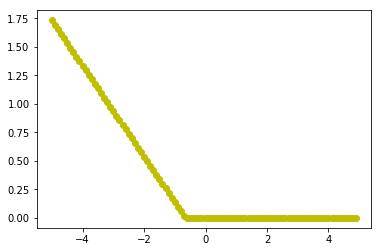

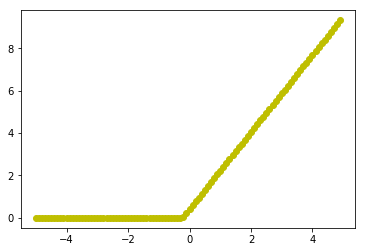

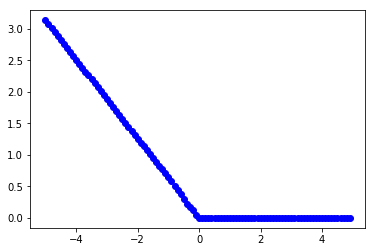

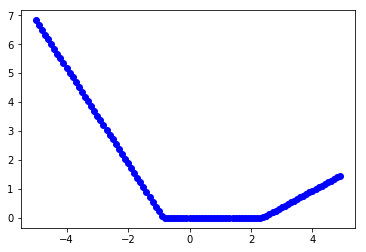

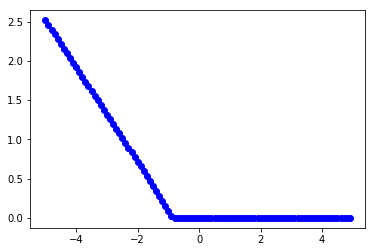

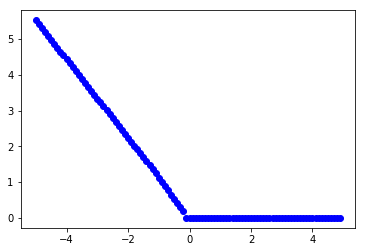

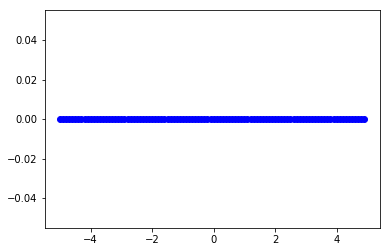

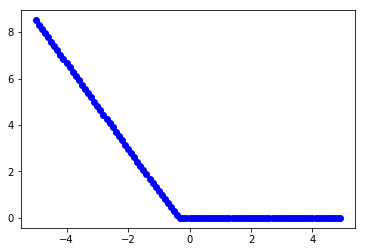

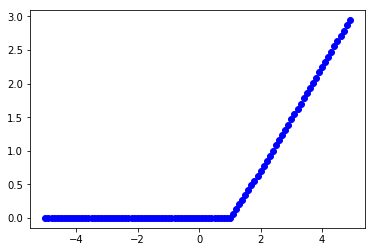

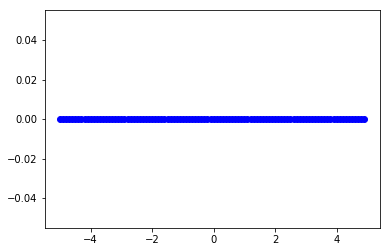

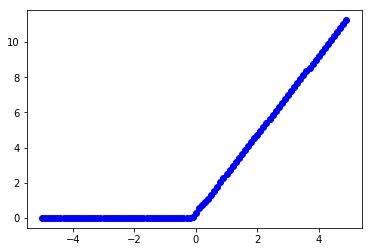

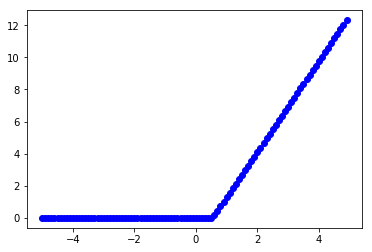

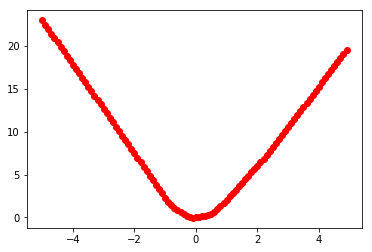

In [176]:
checkLayerPattern(quadratic_model, np.arange(-5.0, 5.0, .1).reshape(-1,1)) #100*1 matrix

Epoch: 0 Loss: 0.181627229440907
Epoch: 1 Loss: 0.1390409065859726
Epoch: 2 Loss: 0.12345081865339726
Epoch: 3 Loss: 0.11912061611278418
Epoch: 4 Loss: 0.11861935083675128


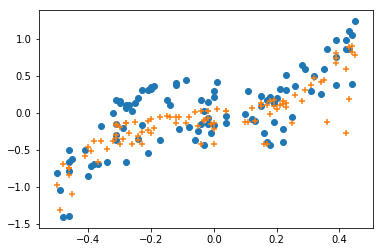

In [185]:
cube_model = train(function='cube')

X_test, y_test = data_generator(100, 'cube')
y_pred = cube_model(Variable(Tensor(X_test))).data.numpy()

plt.scatter(X_test, y_test, marker='o')
plt.scatter(X_test, y_pred, marker='+')
plt.show()

/Users/heyuhao/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


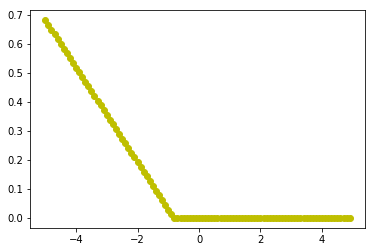

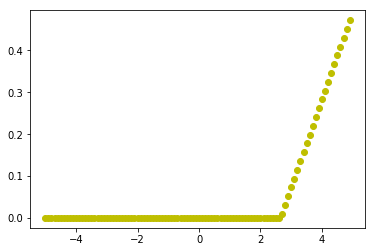

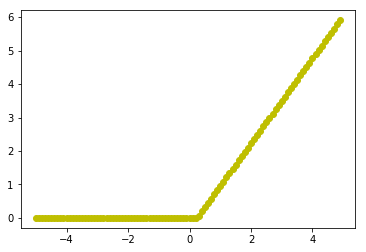

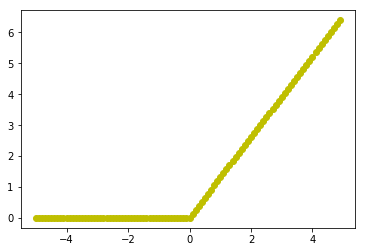

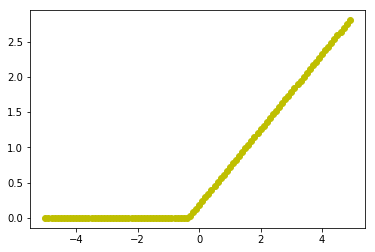

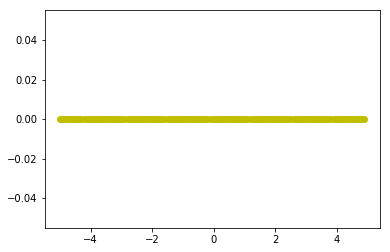

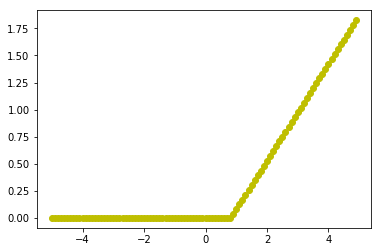

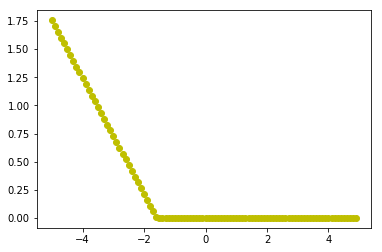

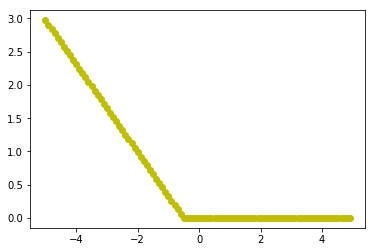

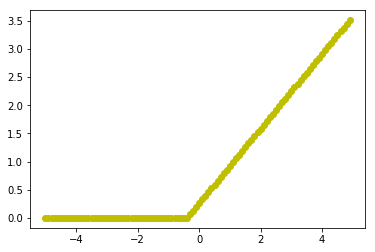

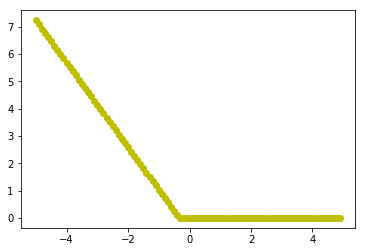

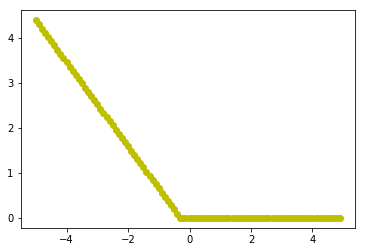

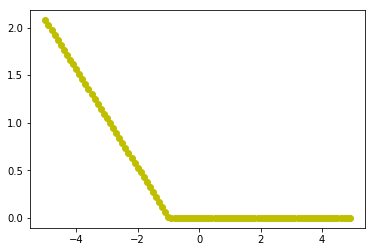

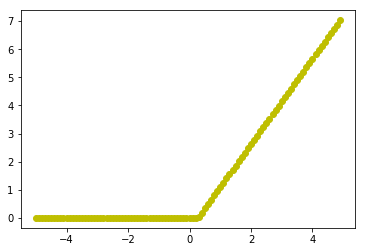

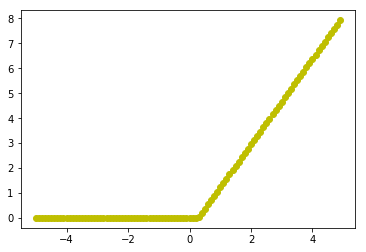

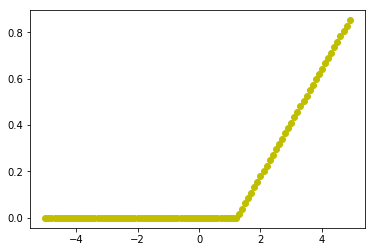

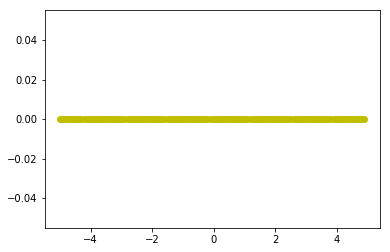

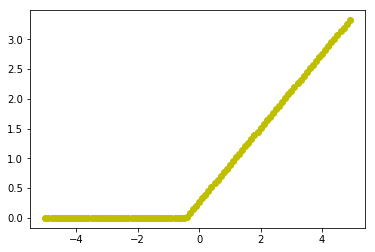

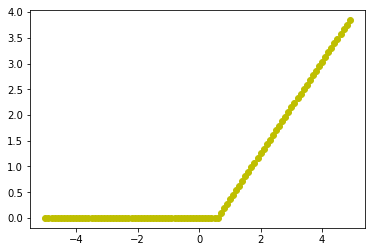

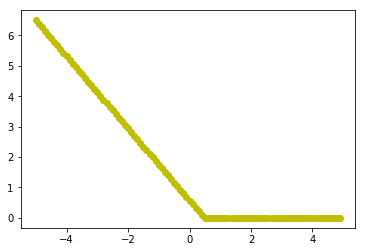

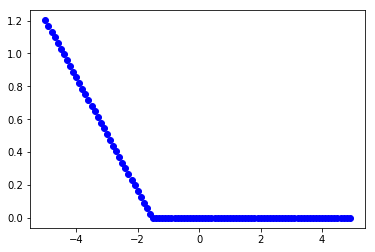

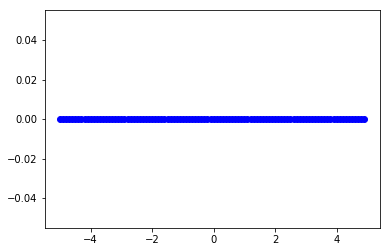

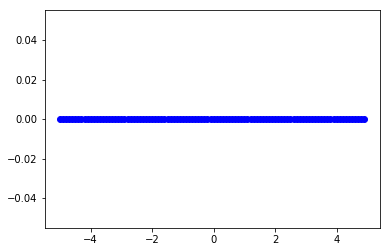

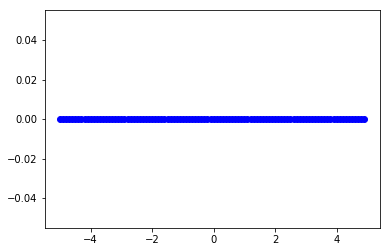

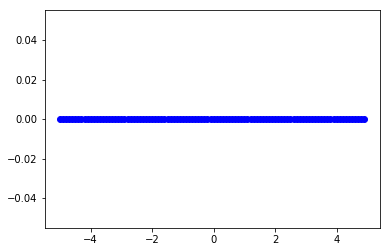

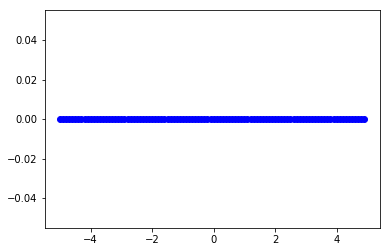

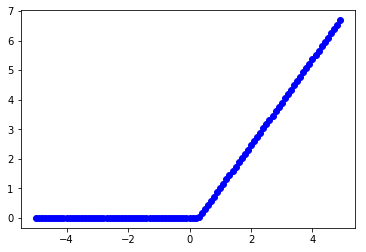

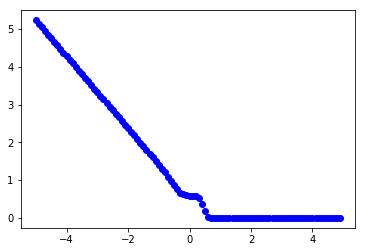

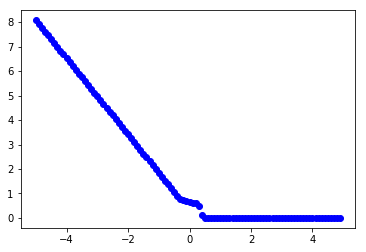

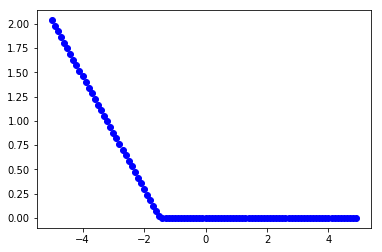

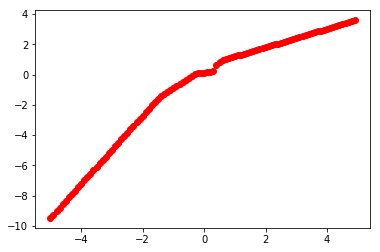

In [186]:
checkLayerPattern(cube_model, np.arange(-5.0, 5.0, .1).reshape(-1,1))